## This first cell loads health insurance data into a DataFrame

In [4]:
import pandas as pd
import numpy as np

df_health = pd.read_csv('http://neueda.conygre.com/pydata/ml_fc/health_insurance_trimmed.csv', index_col=0)
df_health

age  gender    bmi  children smoker     region     charges
1      18    male  33.77         1     no  southeast   1725.5523
2      28    male  33.00         3     no  southeast   4449.4620
4      32    male  28.88         0     no  northwest   3866.8552
5      31  female  25.74         0     no  southeast   3756.6216
6      46  female  33.44         1     no  southeast   8240.5896
...   ...     ...    ...       ...    ...        ...         ...
1332   52  female  44.70         3     no  southwest  11411.6850
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450

[980 rows x 7 columns]

## Data Preparation
We will prepare the data in a simple way by creating some calculated columns that use numerical codes instead of text values

Creat a new column called "charge_category". This will contain a code indicating what range of charges this person fell into. i.e.:

* category 0 : annual charges < 3000
* category 1 : 3000 <= annual charges < 5000
* category 2 : 5000 <= annual charges < 10000
* category 3 : 10000 <= annual charges

In [5]:
df_health['charge_category'] = 0

In [6]:


# if health charges are less than 3000 we'll call this category 0
df_health.loc[ df_health['charges'] < 3000 , 'charge_category'] = 0

# if health charges are between 3000 and 5000 we'll call this category 1
df_health.loc[ (df_health['charges'] >= 3000) &  (df_health['charges'] < 5000), 'charge_category'] = 1

# if health charges are between 5000 and 10000 we'll call this category 2
df_health.loc[ (df_health['charges'] >= 5000) &  (df_health['charges'] < 10000), 'charge_category'] = 2

# if health charges are greater than 10000 we'll call this category 3 
df_health.loc[ df_health['charges'] >= 10000, 'charge_category'] = 3
df_health

age  gender    bmi  children smoker     region     charges  \
1      18    male  33.77         1     no  southeast   1725.5523   
2      28    male  33.00         3     no  southeast   4449.4620   
4      32    male  28.88         0     no  northwest   3866.8552   
5      31  female  25.74         0     no  southeast   3756.6216   
6      46  female  33.44         1     no  southeast   8240.5896   
...   ...     ...    ...       ...    ...        ...         ...   
1332   52  female  44.70         3     no  southwest  11411.6850   
1333   50    male  30.97         3     no  northwest  10600.5483   
1334   18  female  31.92         0     no  northeast   2205.9808   
1335   18  female  36.85         0     no  southeast   1629.8335   
1336   21  female  25.80         0     no  southwest   2007.9450   

      charge_category  
1                   0  
2                   1  
4                   1  
5                   1  
6                   2  
...               ...  
1332                3  
1333                3  
1334                0  
1335                0  
1336                0  

[980 rows x 8 columns]

## Assign a code for gender
* female : 0
* male : 1

In [7]:
df_health['gender_code'] = 0
df_health.loc[ df_health['gender'] == 'male', 'gender_code'] = 1
df_health

age  gender    bmi  children smoker     region     charges  \
1      18    male  33.77         1     no  southeast   1725.5523   
2      28    male  33.00         3     no  southeast   4449.4620   
4      32    male  28.88         0     no  northwest   3866.8552   
5      31  female  25.74         0     no  southeast   3756.6216   
6      46  female  33.44         1     no  southeast   8240.5896   
...   ...     ...    ...       ...    ...        ...         ...   
1332   52  female  44.70         3     no  southwest  11411.6850   
1333   50    male  30.97         3     no  northwest  10600.5483   
1334   18  female  31.92         0     no  northeast   2205.9808   
1335   18  female  36.85         0     no  southeast   1629.8335   
1336   21  female  25.80         0     no  southwest   2007.9450   

      charge_category  gender_code  
1                   0            1  
2                   1            1  
4                   1            1  
5                   1            0  
6                   2            0  
...               ...          ...  
1332                3            0  
1333                3            1  
1334                0            0  
1335                0            0  
1336                0            0  

[980 rows x 9 columns]

## Assign a code for smoking/non-smoking
* smoker : 1
* non-smoker : 0

In [8]:
df_health['smoker_code'] = 0
df_health.loc[ df_health['smoker'] == 'yes', 'smoker_code'] = 1
df_health

age  gender    bmi  children smoker     region     charges  \
1      18    male  33.77         1     no  southeast   1725.5523   
2      28    male  33.00         3     no  southeast   4449.4620   
4      32    male  28.88         0     no  northwest   3866.8552   
5      31  female  25.74         0     no  southeast   3756.6216   
6      46  female  33.44         1     no  southeast   8240.5896   
...   ...     ...    ...       ...    ...        ...         ...   
1332   52  female  44.70         3     no  southwest  11411.6850   
1333   50    male  30.97         3     no  northwest  10600.5483   
1334   18  female  31.92         0     no  northeast   2205.9808   
1335   18  female  36.85         0     no  southeast   1629.8335   
1336   21  female  25.80         0     no  southwest   2007.9450   

      charge_category  gender_code  smoker_code  
1                   0            1            0  
2                   1            1            0  
4                   1            1            0  
5                   1            0            0  
6                   2            0            0  
...               ...          ...          ...  
1332                3            0            0  
1333                3            1            0  
1334                0            0            0  
1335                0            0            0  
1336                0            0            0  

[980 rows x 10 columns]

### Now train a logistic regression model to predict the charge category for a person
Separate the dataframe into:

* X: independent variable matrix  - this is the first 4 columns
* y: dependant variable vector    - this is just the 'class' column

In [9]:
# Make a variable called X here that contains just the first 4 columns of df_health
#X = df_health.iloc[:, :4]
X = df_health[["age", "gender_code", "bmi", "children", "smoker_code"]]
y = df_health["charge_category"]

Split our dataset into training and test sets

In [10]:
# Split the dataset into train and test sets - use the scikit learn "train_test_split" function
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Create a logistic model or Neural Net e.g. (sklearn.neural_network.MLPClassifier) object and train with the training data

In [11]:
# Choose a model to train (e.g. create an object of the type mentioned abeve, or a different scikit learn Classification type)
# the MLPClassifier might take parameters on creation such as: MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

model_logistic = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=5000)

# Then call model.fit to train your model
model_logistic.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=5000)

Doing the same, but with a Neural Network (MLP Classifier)

In [12]:
model_MLPClassifier = MLPClassifier(max_iter = 5000)
model_MLPClassifier.fit(X_train, y_train.values.ravel())

MLPClassifier(max_iter=5000)

Validating the accuracy of the Logistic Regression with the test data using a Confusion Matrix

In [45]:
# import the confusion matrix from sklearn.metrics
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, plot_roc_curve, plot_confusion_matrix
# now call model.predict with the test data
predictions_logistic = model_logistic.predict(X_test)

predictions_logistic
# use the confusion matrix to check the validity of those predictions
df_confusion_logistic = pd.DataFrame(data=confusion_matrix(y_test, predictions_logistic), columns = df_health.charge_category.unique())
df_confusion_logistic

0   1   2   3
0  31   3   0   0
1   1  23   8   0
2   0   1  69   9
3   2   1   3  45

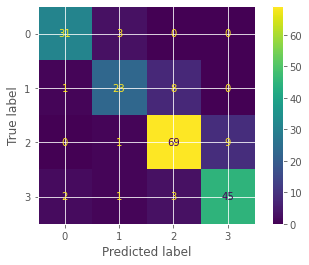

Validating the accuracy of the MLPClassifier with the test data using a Confusion Matrix

In [14]:
predictions_MLPClassifier = model_MLPClassifier.predict(X_test)

predictions_MLPClassifier
# use the confusion matrix to check the validity of those predictions
df_confusion_MLPClassifier = pd.DataFrame(data=confusion_matrix(y_test, predictions_MLPClassifier), columns = df_health.charge_category.unique())
df_confusion_MLPClassifier

0   1   2   3
0  30   4   0   0
1   1  26   5   0
2   0   2  69   8
3   1   0   5  45

Most models will have a function to get the probability of being in each category for a particular prediction (e.g. predict_proba)

In [15]:
# use predict_proba
model_logistic.predict_proba(X)

array([[9.67518654e-01, 3.22536674e-02, 2.27409698e-04, 2.69348568e-07],
       [1.53016294e-03, 6.17649822e-01, 3.75957361e-01, 4.86265372e-03],
       [9.53688508e-02, 6.61040626e-01, 2.38784557e-01, 4.80596667e-03],
       ...,
       [9.73828369e-01, 2.60058272e-02, 1.65560831e-04, 2.43127233e-07],
       [9.78563746e-01, 2.13184521e-02, 1.17653827e-04, 1.48121037e-07],
       [8.58161953e-01, 1.39096870e-01, 2.73223686e-03, 8.93967043e-06]])

predict_prob for MLPClassifier

In [16]:
model_MLPClassifier.predict_proba(X)

array([[9.76680639e-01, 1.34610961e-02, 1.83403856e-04, 9.67486098e-03],
       [3.30550241e-03, 6.92191560e-01, 2.58681594e-01, 4.58213434e-02],
       [1.36414562e-01, 7.05017134e-01, 1.28182987e-01, 3.03853181e-02],
       ...,
       [9.77068051e-01, 9.13903453e-03, 1.02247319e-03, 1.27704412e-02],
       [9.48089256e-01, 3.95112918e-03, 1.32868957e-03, 4.66309252e-02],
       [8.71816191e-01, 1.24707517e-01, 1.86246390e-03, 1.61382885e-03]])

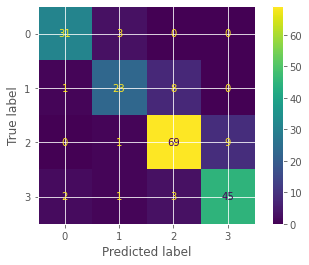

In [50]:
plot_confusion_matrix(model_logistic, X_test, y_test)

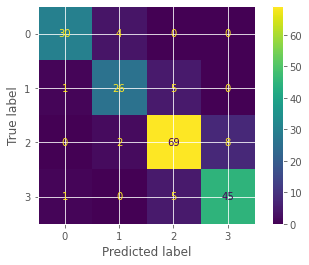

In [51]:
plot_confusion_matrix(model_MLPClassifier, X_test, y_test)

In [55]:
plot_roc_curve(model_logistic, X_test, y_test,
                         name='ROC Curve',
                         alpha=0.3, lw=1)

ValueError: LogisticRegression should be a binary classifier

In [44]:
# Import matplotlib
import matplotlib.pyplot as plt

for cat in df_health["charge_category"].unique():
    trp, fpr, classes = roc_curve(y_test, predictions_logistic, pos_label=cat)
    plt.subplot(2,2,cat + 1)
    plt.style.use('ggplot')
    plt.plot(trp)
    plt.plot(fpr)
    plt.legend(['True Positive', 'False Positive'])
    plt.title('TP vs FP for Charge Cat {}'.format(cat + 1))

plt.tight_layout()
plt.show()
# Set the style to ggplot


In [18]:
from sklearn import preprocessing
y_test_curve = preprocessing.label_binarize(y_test.to_numpy(), classes=[0, 1, 2, 3])
y_score_curve = preprocessing.label_binarize(predictions_logistic, classes=[0, 1, 2, 3])

# roc_curve(y_true=y_test_curve, y_score=y_score_curve)